# <center> 19CSE431 - Digital Image Processing </center>
## <center> Lab Evaluation 1 </center>

### Members:  





| S.No      | Name | Roll No     |
| :---:        |    :----:   |          :---: |
| 1.      | M Jietthesh Balaji       | CB.EN.U4CSE20322   |
| 2.   | Raj Mota        | CB.EN.U4CSE20349      |
| 3.      | Sai Sidharth Sriram       | CB.EN.U4CSE20352   |
| 4.   | Sakthi Vikraman        | CB.EN.U4CSE20353      |

### Problem Statement:  
Recently, Image Processing Techniques are widely used in several medical areas for image improvement and nowadays is used for early detection and treatment. Medical field is one such field where time factor is at the utmost priority and it is very important to detect the abnormal tissues in target images in the case of Cancer. In recent times, Lung Cancer has become a sign of fear amongst the people all over the world. With the advancement in technology, it is now possible to automate this whole process with the help of Computer Vision. With the help of Image Processing techniques, it is now possible to automate the pre-processing of Medical Images which aids in early detection of Cancer growth. In this particular paper, CT (Computed Tomography) Scan Images of Lungs are processed using various techniques like Filtering, Noise Removal, Morphological Techniques and Segmentation Techniques. Image Quality and Accuracy are the core areas of focus in this paper and our end goal is to generalize the methods use so that the same procedure can be scaled up to work with any given dataset. 

### Topic Wise Split:

**M Jietthesh Balaji** -  

Histogram Equilization, Local Histogram Equalization, Histogram Matching, Smoothing Filters - Linear: Box Filter, Non-Linear: Min and Max Filter  

**Raj Mota** -  

Image Interpolation, Arithmetic Operations on Digital Images, Single Pixel Operations - Linear and Log Transformations.  

**Sai Sidharth** -  

Single Pixel Operation - Power Law (Gamma Correction), Region Based Transformation - Intensity Level Slicing, Bit Plane Slicing. Smoothing Filters - Linear: Gaussian, Non-Linear: Median Filter.  

**Sakthi Vikraman** -   

Sharpening Filters - Laplacian, Sobel, High Boost Filtering and Unsharp Masking


In [1]:
from matplotlib import pyplot as plt
import numpy as np
from skimage import io, img_as_float
from skimage.filters import unsharp_mask
from skimage.filters import median
from skimage.morphology import disk
from skimage.filters import gaussian
from skimage.filters import laplace
from skimage.filters import sobel
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go
import cv2

#### Initializing the Image Variables 

In [2]:
image_path = r'C:/Users/Saisid/Downloads/College/Semester 5/19CSE431 - Digital Image Processing/Additional Files/Lung Cancer Datasets/Dataset - Kaggle/Image Dataset/'

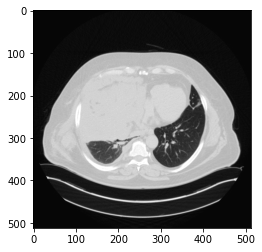

In [3]:
img_base = cv2.imread(image_path + 'Cancer/cancer_16.jpg',0)
plt.imshow(img_base, 'gray')

#### Raj Mota: 

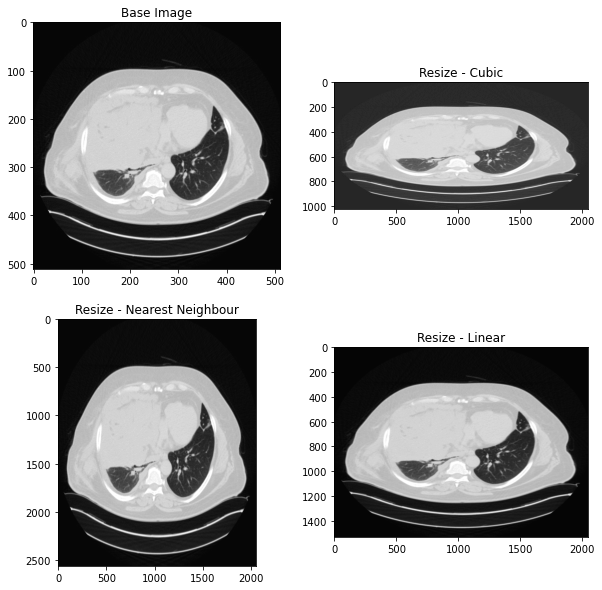

In [4]:
#Image Interpolation
resized_cubic = cv2.resize(img_base, None, fx = 4, fy = 2, interpolation = cv2.INTER_CUBIC)
resized_nearest = cv2.resize(img_base, None, fx = 4, fy = 5, interpolation = cv2.INTER_NEAREST)
resized_linear = cv2.resize(img_base, None, fx = 4, fy = 3, interpolation = cv2.INTER_LINEAR)

fig = plt.figure(figsize=(10, 10))

axis1 = fig.add_subplot(2,2,1)
axis1.imshow(img_base, cmap='gray')
axis1.title.set_text('Base Image')

axis2 = fig.add_subplot(2,2,2)
axis2.imshow(resized_cubic, cmap='gray')
axis2.title.set_text('Resize - Cubic')

axis3 = fig.add_subplot(2,2,3)
axis3.imshow(resized_nearest, cmap='gray')
axis3.title.set_text('Resize - Nearest Neighbour')

axis4  = fig.add_subplot(2,2,4)
axis4.imshow(resized_linear, cmap='gray')
axis4.title.set_text('Resize - Linear')

In [5]:
def generate_mask(img_base):
    mask = img_base < 175
    img_borderless = clear_border(mask)
    region = label(img_borderless)
    reg = regionprops(region)
    areas = [r.area for r in reg]
    indices = np.argsort(areas)[::-1]
    temp_mask = np.zeros_like(region)
    temp_mask = np.zeros_like(region)
    for i in indices[:3]:
        temp_mask[tuple(reg[i].coords.T)] = i+1
    temp_mask = temp_mask > 0
    return temp_mask

C:\Users\Saisid\AppData\Local\Temp\ipykernel_5376\1321058696.py:6: RuntimeWarning: divide by zero encountered in true_divide
  divided_image = img_base / img_mask


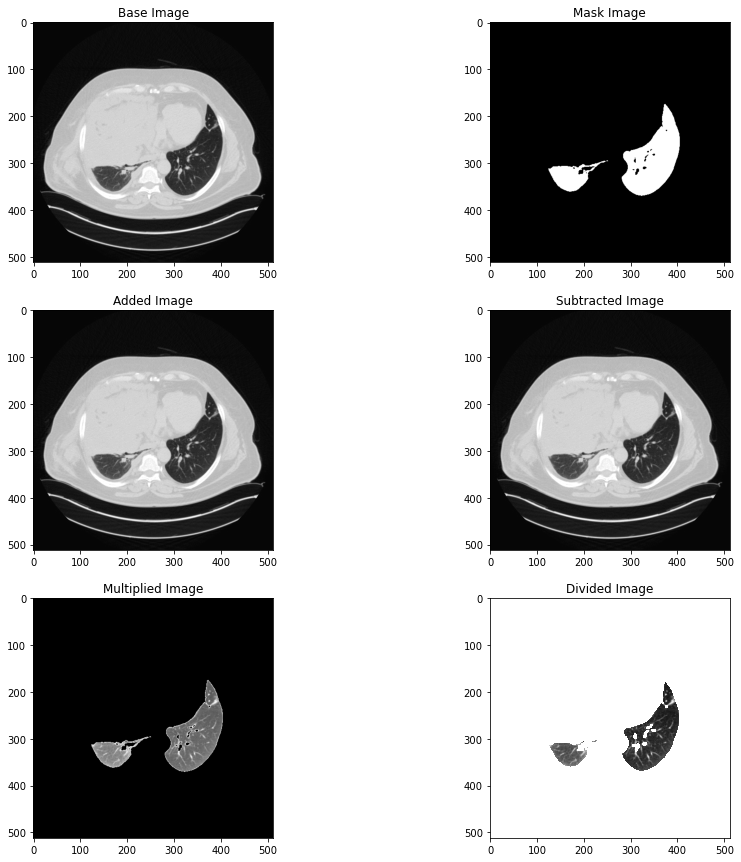

In [6]:
#1. Arithmetic Operations
img_mask = generate_mask(img_base)
added_image = img_base + img_mask
subtracted_image = img_base - img_mask
multiplied_image = img_base * img_mask
divided_image = img_base / img_mask

fig = plt.figure(figsize=(15, 15))

axis1 = fig.add_subplot(3,2,1)
axis1.imshow(img_base, cmap='gray')
axis1.title.set_text('Base Image')

axis2 = fig.add_subplot(3,2,2)
axis2.imshow(img_mask, cmap='gray')
axis2.title.set_text('Mask Image')

axis3 = fig.add_subplot(3,2,3)
axis3.imshow(added_image, cmap='gray')
axis3.title.set_text('Added Image')

axis4  = fig.add_subplot(3,2,4)
axis4.imshow(subtracted_image, cmap='gray')
axis4.title.set_text('Subtracted Image')

axis5 = fig.add_subplot(3,2,5)
axis5.imshow(multiplied_image, cmap='gray')
axis5.title.set_text('Multiplied Image')

axis6 = fig.add_subplot(3,2,6)
axis6.imshow(divided_image, cmap='gray')
axis6.title.set_text('Divided Image')

C:\Users\Saisid\AppData\Local\Temp\ipykernel_5376\3122174178.py:2: RuntimeWarning: divide by zero encountered in log
  img_log = c * np.log (img_base + 1)


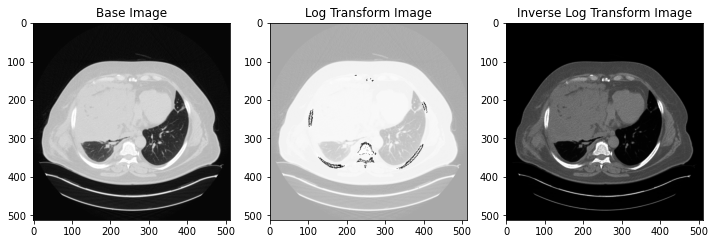

In [7]:
c = 255 / np.log (1 + np.max (img_base)) # c = 255 / (log (1 + max_input_pixel_value)) 
img_log = c * np.log (img_base + 1)
img_log = np.array (img_log, dtype = np.uint8)

img_ilog = np.exp(img_base/c)-1
img_ilog = np.array (img_ilog, dtype = np.uint8) # float value will be converted to int

fig = plt.figure(figsize=(12, 12))

axis1 = fig.add_subplot(2,3,1)
axis1.imshow(img_base, cmap='gray')
axis1.title.set_text('Base Image')

axis2 = fig.add_subplot(2,3,2)
axis2.imshow(img_log, cmap='gray')
axis2.title.set_text('Log Transform Image')

axis3 = fig.add_subplot(2,3,3)
axis3.imshow(img_ilog, cmap='gray')
axis3.title.set_text('Inverse Log Transform Image')

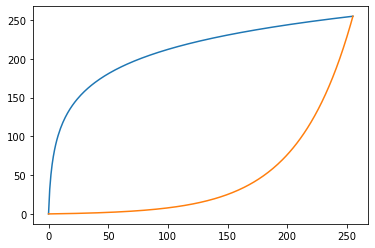

In [8]:
#plot of Inverse log and log

r = np.arange(0,256)
c = 255/(np.log(1 + 255))
y = c*np.log(1+r)
c2 = 255/(np.log(1 + 255))
y2 = np.exp(r)**(1/c)-1

plt.plot(r,y)
plt.plot(r,y2)

#### Sakthi Vikraman

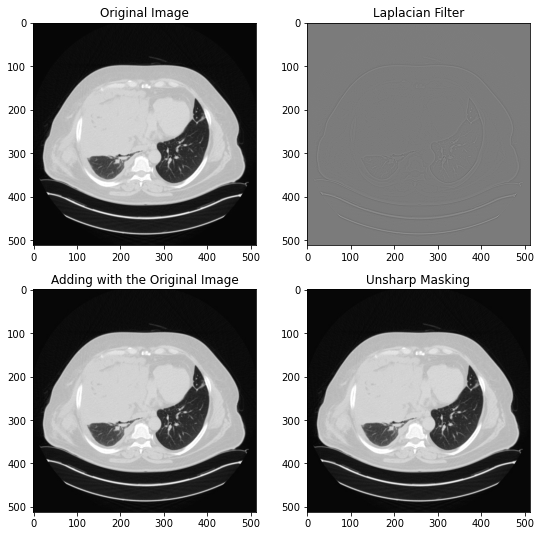

In [9]:
#Laplacian
img_edges = laplace(img_base, 3)
unsharp_image_edges = unsharp_mask(img_base, radius = 5, amount = 1)
img_added = img_edges + img_base
img_added_2 = unsharp_image_edges + img_base

fig = plt.figure(figsize=(9,9))

#(2,2,1) -> x, y and which position
axis1 = fig.add_subplot(2,2,1)
axis1.imshow(img_base, cmap='gray')
axis1.title.set_text('Original Image')

axis2 = fig.add_subplot(2,2,2)
axis2.imshow(img_edges, cmap='gray')
axis2.title.set_text('Laplacian Filter')

axis3 = fig.add_subplot(2,2,3)
axis3.imshow(img_added, cmap='gray')
axis3.title.set_text('Adding with the Original Image')

axis4 = fig.add_subplot(2,2,4)
axis4.imshow(img_added_2, cmap='gray')
axis4.title.set_text('Unsharp Masking')

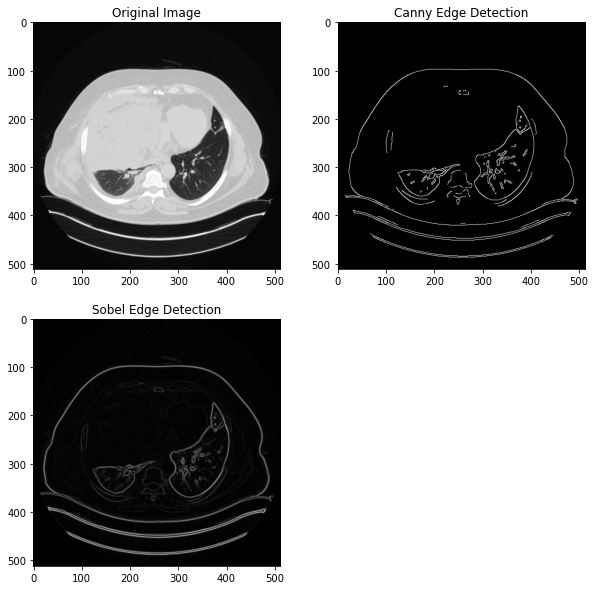

In [10]:
edge = cv2.Canny(img_base, 140 , 175)
edge_sobel = sobel(img_base)

fig = plt.figure(figsize=(10,10))

#(2,2,1) -> x, y and which position
axis1 = fig.add_subplot(2,2,1)
axis1.imshow(img_base, cmap='gray')
axis1.title.set_text('Original Image')

axis2 = fig.add_subplot(2,2,2)
axis2.imshow(edge, cmap='gray')
axis2.title.set_text('Canny Edge Detection')

axis3 = fig.add_subplot(2,2,3)
axis3.imshow(edge_sobel, cmap='gray')
axis3.title.set_text('Sobel Edge Detection')

#### Sai Sidharth

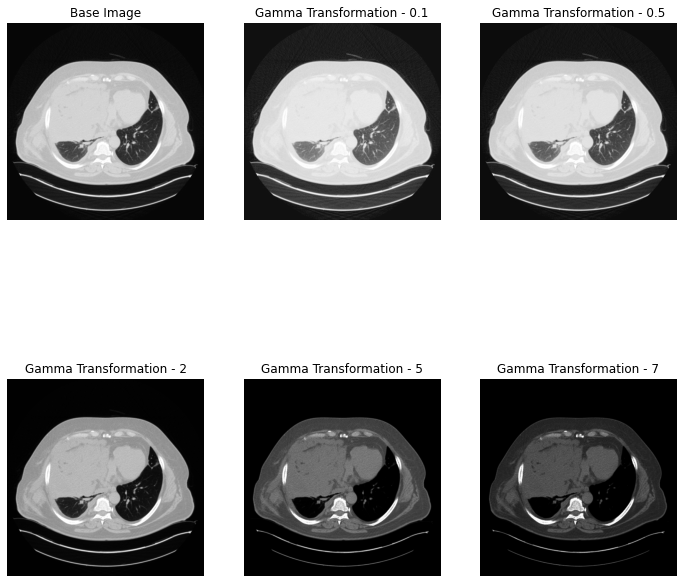

In [11]:
gamma_corrected_1 = np.array(255*(img_base / 255) ** 0.1, dtype = 'uint8')
gamma_corrected_2 = np.array(255*(img_base / 255) ** 0.5, dtype = 'uint8')
gamma_corrected_3 = np.array(255*(img_base / 255) ** 2, dtype = 'uint8')
gamma_corrected_4 = np.array(255*(img_base / 255) ** 5, dtype = 'uint8')
gamma_corrected_5 = np.array(255*(img_base / 255) ** 7, dtype = 'uint8')

fig = plt.figure(figsize=(12, 12))

axis1 = fig.add_subplot(2,3,1)
axis1.imshow(img_base, cmap='gray')
axis1.axis('off')
axis1.title.set_text('Base Image')

axis2 = fig.add_subplot(2,3,2)
axis2.imshow(gamma_corrected_1, cmap='gray')
axis2.axis('off')
axis2.title.set_text('Gamma Transformation - 0.1')

axis2 = fig.add_subplot(2,3,3)
axis2.imshow(gamma_corrected_2, cmap='gray')
axis2.axis('off')
axis2.title.set_text('Gamma Transformation - 0.5')

axis2 = fig.add_subplot(2,3,4)
axis2.imshow(gamma_corrected_3, cmap='gray')
axis2.axis('off')
axis2.title.set_text('Gamma Transformation - 2')

axis2 = fig.add_subplot(2,3,5)
axis2.imshow(gamma_corrected_4, cmap='gray')
axis2.axis('off')
axis2.title.set_text('Gamma Transformation - 5')

axis2 = fig.add_subplot(2,3,6)
axis2.imshow(gamma_corrected_5, cmap='gray')
axis2.axis('off')
axis2.title.set_text('Gamma Transformation - 7')

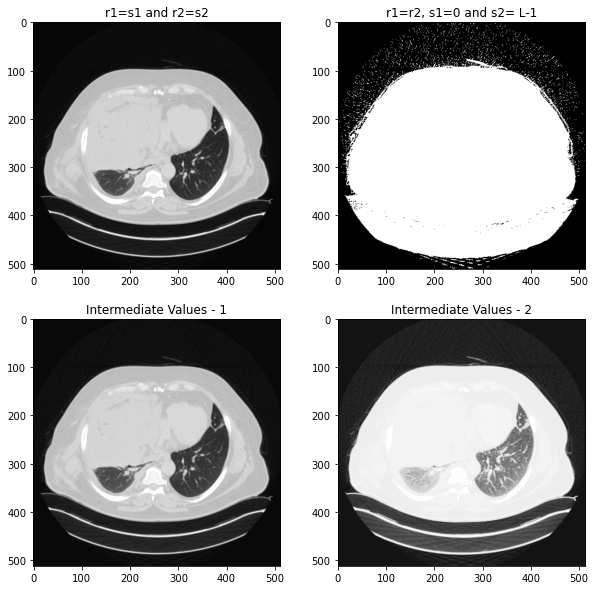

In [12]:
#Region Based Transformation: 
#    1. Contrast Streching
#    2. Intensity-Level Slicing
#    3. Bit-Plane Slicing

#1. Contrast Streching
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

pixelVal_vec = np.vectorize(pixelVal)
#Setting r1, r2, s1 and s2 values

#Set 1 - Same Output when r1 = s1 and r2 = s2
r1_1 = 15
s1_1 = 15
r2_1 = 140
s2_1 = 140

#Set 2 - Binary Image when r1 = r2 and s1 = 0 and s2 = L - 1
r1_2 = 45
s1_2 = 0
r2_2 = 45
s2_2 = 255

#Set 3 - Random Values 1
r1_3 = 57
s1_3 = 74
r2_3 = 123
s2_3 = 134

#Set 4 - Random Values 2
r1_4 = 32
s1_4 = 12
r2_4 = 97
s2_4 = 210

contrast_stretched_1 = pixelVal_vec(img_base, r1_1, s1_1, r2_1, s2_1)
contrast_stretched_2 = pixelVal_vec(img_base, r1_2, s1_2, r2_2, s2_2)
contrast_stretched_3 = pixelVal_vec(img_base, r1_3, s1_3, r2_3, s2_3)
contrast_stretched_4 = pixelVal_vec(img_base, r1_4, s1_4, r2_4, s2_4)

fig = plt.figure(figsize=(10,10))

#(2,2,1) -> x, y and which position
axis1 = fig.add_subplot(2,2,1)
axis1.imshow(contrast_stretched_1, cmap='gray')
axis1.title.set_text('r1=s1 and r2=s2')

axis2 = fig.add_subplot(2,2,2)
axis2.imshow(contrast_stretched_2, cmap='gray')
axis2.title.set_text('r1=r2, s1=0 and s2= L-1')

axis3 = fig.add_subplot(2,2,3)
axis3.imshow(contrast_stretched_3, cmap='gray')
axis3.title.set_text('Intermediate Values - 1')

axis4 = fig.add_subplot(2,2,4)
axis4.imshow(contrast_stretched_4, cmap='gray')
axis4.title.set_text('Intermediate Values - 2')

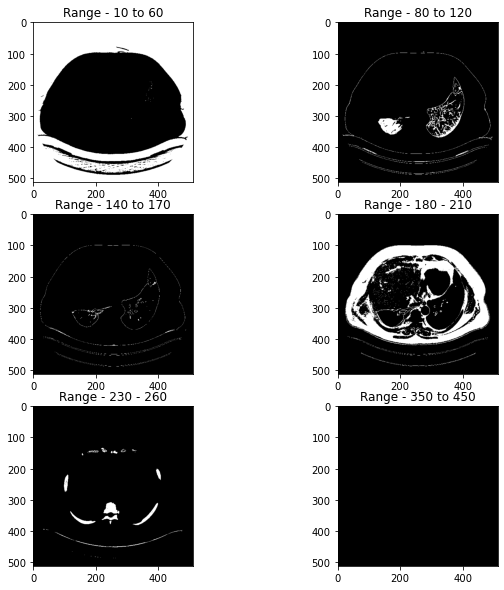

In [13]:
#2. Intensity Transformation
def intensityTransform(img, rows, cols, min_range, max_range):
    img_output = np.zeros((rows,cols),dtype = 'uint8')
    for row in range(rows):
        for col in range(cols):
            if img[row,col] > min_range and img[row,col] < max_range:
                img_output[row, col] = 255
            else:
                img_output[row, col] = 0
    return img_output

#Set 1
min_range_1 = 10
max_range_1 = 60

#Set 2
min_range_2 = 80
max_range_2 = 120

#Set 3
min_range_3 = 140
max_range_3 = 170

#Set 4
min_range_4 = 180
max_range_4 = 210

#Set 5
min_range_5 = 230
max_range_5 = 260

#Set 6
min_range_6 = 350
max_range_6 = 450

rows = img_base.shape[0]
cols = img_base.shape[1]

img_output_1 = intensityTransform(img_base, rows, cols, min_range_1, max_range_1) 
img_output_2 = intensityTransform(img_base, rows, cols, min_range_2, max_range_2)
img_output_3 = intensityTransform(img_base, rows, cols, min_range_3, max_range_3)
img_output_4 = intensityTransform(img_base, rows, cols, min_range_4, max_range_4)
img_output_5 = intensityTransform(img_base, rows, cols, min_range_5, max_range_5)
img_output_6 = intensityTransform(img_base, rows, cols, min_range_6, max_range_6)

fig = plt.figure(figsize=(10,10))

#(2,2,1) -> x, y and which position
axis1 = fig.add_subplot(3,2,1)
axis1.imshow(img_output_1, cmap='gray')
axis1.title.set_text('Range - 10 to 60')

axis2 = fig.add_subplot(3,2,2)
axis2.imshow(img_output_2, cmap='gray')
axis2.title.set_text('Range - 80 to 120')

axis3 = fig.add_subplot(3,2,3)
axis3.imshow(img_output_3, cmap='gray')
axis3.title.set_text('Range - 140 to 170')

axis4 = fig.add_subplot(3,2,4)
axis4.imshow(img_output_4, cmap='gray')
axis4.title.set_text('Range - 180 - 210')

axis4 = fig.add_subplot(3,2,5)
axis4.imshow(img_output_5, cmap='gray')
axis4.title.set_text('Range - 230 - 260')

axis4 = fig.add_subplot(3,2,6)
axis4.imshow(img_output_6, cmap='gray')
axis4.title.set_text('Range - 350 to 450')

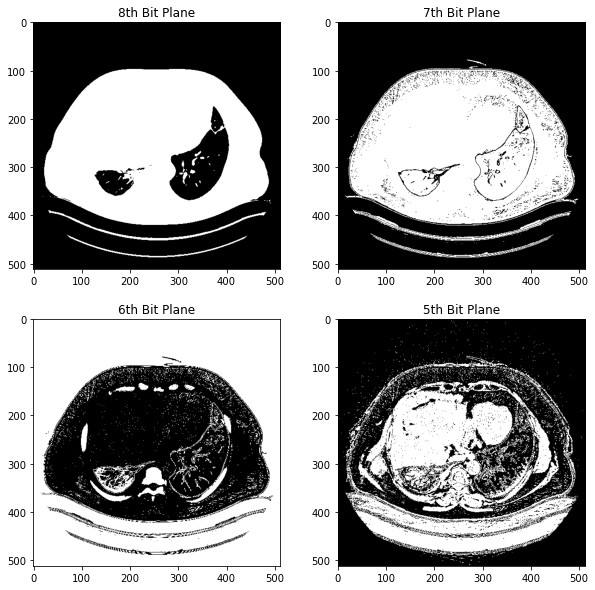

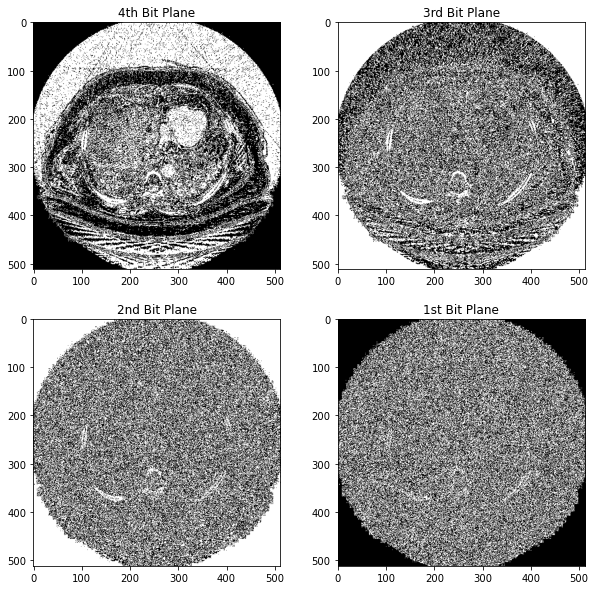

In [14]:
#3. Bit-Plane Slicing
rows = img_base.shape[0]
cols = img_base.shape[1]

#For Bit-Plane slicing, we have to represent every pixel in a binary form to extract each bit,
#Hence we iterate over every pixel and use np.binary_repr() to get the binary representation and then store that 
#value in a list
binary_list = []
for row in range(rows):
    for col in range(cols):
         binary_list.append(np.binary_repr(img_base[row][col] ,width=8)) 
        # np.binary_repr(value to be represented in binary, width = no. of bits)

# We have a list of strings where each string represents binary pixel value. To extract bit planes 
# We need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in binary_list], dtype = np.uint8) * 128).reshape(rows, cols)
seven_bit_img = (np.array([int(i[1]) for i in binary_list], dtype = np.uint8) * 64).reshape(rows, cols)
six_bit_img = (np.array([int(i[2]) for i in binary_list], dtype = np.uint8) * 32).reshape(rows, cols)
five_bit_img = (np.array([int(i[3]) for i in binary_list], dtype = np.uint8) * 16).reshape(rows, cols)
four_bit_img = (np.array([int(i[4]) for i in binary_list], dtype = np.uint8) * 8).reshape(rows, cols)
three_bit_img = (np.array([int(i[5]) for i in binary_list], dtype = np.uint8) * 4).reshape(rows, cols)
two_bit_img = (np.array([int(i[6]) for i in binary_list], dtype = np.uint8) * 2).reshape(rows, cols)
one_bit_img = (np.array([int(i[7]) for i in binary_list], dtype = np.uint8) * 1).reshape(rows, cols)

eight_bit_img_out = cv2.normalize(eight_bit_img, 0, 255, cv2.NORM_MINMAX)
seven_bit_img_out = cv2.normalize(seven_bit_img, 0, 255, cv2.NORM_MINMAX)
six_bit_img_out = cv2.normalize(six_bit_img, 0, 255, cv2.NORM_MINMAX)
five_bit_img_out = cv2.normalize(five_bit_img, 0, 255, cv2.NORM_MINMAX)
four_bit_img_out = cv2.normalize(four_bit_img, 0, 255, cv2.NORM_MINMAX)
three_bit_img_out = cv2.normalize(three_bit_img, 0, 255, cv2.NORM_MINMAX)
two_bit_img_out = cv2.normalize(two_bit_img, 0, 255, cv2.NORM_MINMAX)
one_bit_img_out = cv2.normalize(one_bit_img, 0, 255, cv2.NORM_MINMAX)

fig = plt.figure(figsize=(10,10))

axis1 = fig.add_subplot(2,2,1)
axis1.imshow(eight_bit_img_out, cmap='gray')
axis1.title.set_text('8th Bit Plane')

axis2 = fig.add_subplot(2,2,2)
axis2.imshow(seven_bit_img_out, cmap='gray')
axis2.title.set_text('7th Bit Plane')

axis3 = fig.add_subplot(2,2,3)
axis3.imshow(six_bit_img_out, cmap='gray')
axis3.title.set_text('6th Bit Plane')

axis4 = fig.add_subplot(2,2,4)
axis4.imshow(five_bit_img_out, cmap='gray')
axis4.title.set_text('5th Bit Plane')


fig = plt.figure(figsize=(10,10))

axis1 = fig.add_subplot(2,2,1)
axis1.imshow(four_bit_img_out, cmap='gray')
axis1.title.set_text('4th Bit Plane')

axis2 = fig.add_subplot(2,2,2)
axis2.imshow(three_bit_img_out, cmap='gray')
axis2.title.set_text('3rd Bit Plane')

axis3 = fig.add_subplot(2,2,3)
axis3.imshow(two_bit_img_out, cmap='gray')
axis3.title.set_text('2nd Bit Plane')

axis4 = fig.add_subplot(2,2,4)
axis4.imshow(one_bit_img_out, cmap='gray')
axis4.title.set_text('1st Bit Plane')


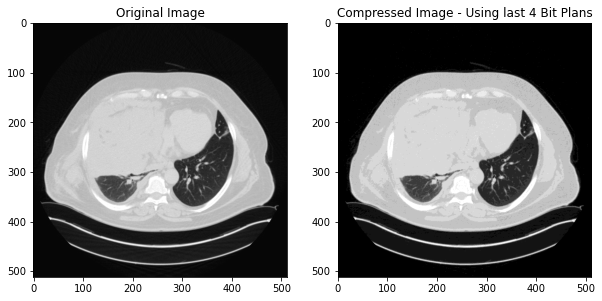

In [15]:
#From the above bit plane slice, we can infer that Bit planes 8, 7, 6 and 5 make up majority of the detail
#Hence we can use these 4 bit planes and merge them to form a new compressed image
img_compressed = eight_bit_img + seven_bit_img + six_bit_img + five_bit_img
fig = plt.figure(figsize=(10,10))

axis1 = fig.add_subplot(1,2,1)
axis1.imshow(img_base, cmap='gray')
axis1.title.set_text('Original Image')

axis2 = fig.add_subplot(1,2,2)
axis2.imshow(img_compressed, cmap='gray')
axis2.title.set_text('Compressed Image - Using last 4 Bit Plans')

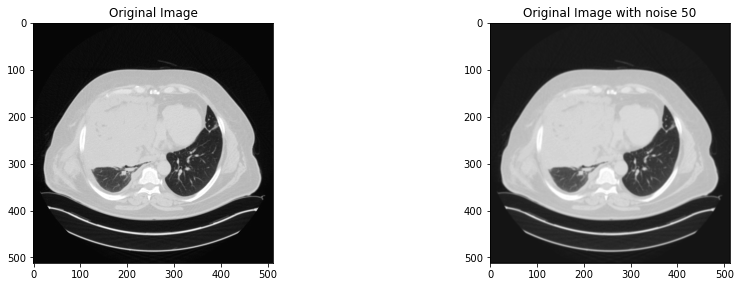

In [16]:
#Gaussian is actually a bell curve

# Gaussian kernal is designed in such a way that it doesn't affect the original image - Center pixel has the max value and gradually it decreases as we go away from the center

# cv2.BORDER_CONSTANT or mode = constant -> Means that the border will take a constant value
gaussian_noise_25 = cv2.GaussianBlur(img_base, (5,5), 1, borderType = cv2.BORDER_CONSTANT)

fig = plt.figure(figsize=(15,15))

#(2,2,1) -> x, y and which position
axis1 = fig.add_subplot(3,2,1)
axis1.imshow(img_base, cmap='gray')
axis1.title.set_text('Original Image')

axis2 = fig.add_subplot(3,2,2)
axis2.imshow(gaussian_noise_25, cmap='gray')
axis2.title.set_text('Original Image with noise 50')


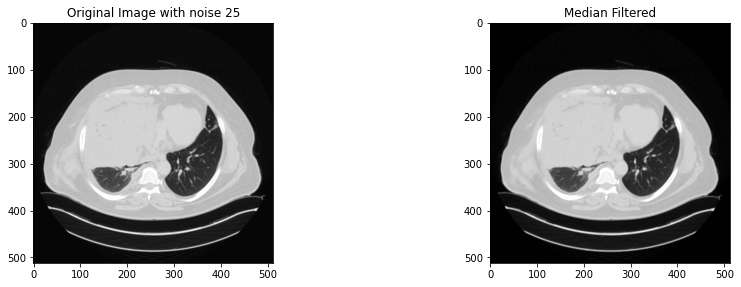

In [17]:
#Median Filtering
# In the neighbourhood of every pixel the median is taken and in the case of Salt and Pepper noise, 
# they appear as spikes compared to other pixels and since we are taking the median, this suppresses 
# those spikes and doesn't take them into account

median_noise_25 = cv2.medianBlur(img_base, 3)
#median(image, kernal size -> disk(n), mode='for padding', cval - padding values)
median_noise_50 = median(img_base, disk(3), mode='constant', cval=0.0)
median_saltandpepper = cv2.medianBlur(img_base, 3)

fig = plt.figure(figsize=(15,15))

#(2,2,1) -> x, y and which position
axis1 = fig.add_subplot(3,2,1)
axis1.imshow(img_base, cmap='gray')
axis1.title.set_text('Original Image with noise 25')

axis2 = fig.add_subplot(3,2,2)
axis2.imshow(median_saltandpepper, cmap='gray')
axis2.title.set_text('Median Filtered')

#### M Jietthesh Balaji

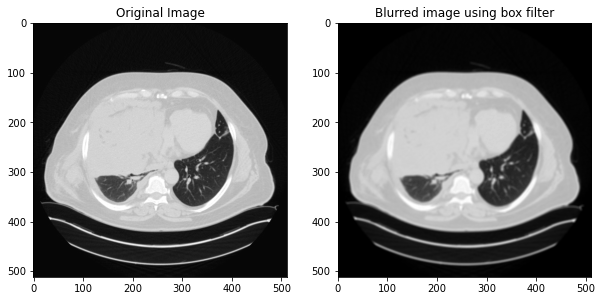

In [18]:
#Box Filter
img_box = cv2.blur(img_base,(5,5))
fig = plt.figure(figsize=(10,10))

axis1 = fig.add_subplot(1,2,1)
axis1.imshow(img_base, cmap='gray')
axis1.title.set_text('Original Image')

axis2 = fig.add_subplot(1,2,2)
axis2.imshow(img_box, cmap='gray')
axis2.title.set_text('Blurred image using box filter')

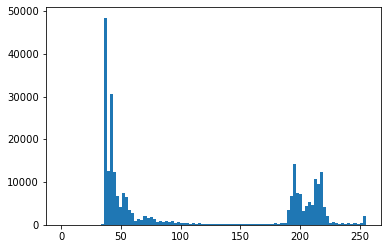

In [19]:
#Plotting Histogram first
#Original Image
plt.hist(img_base.flat, bins=100, range = (0,255))
plt.show()

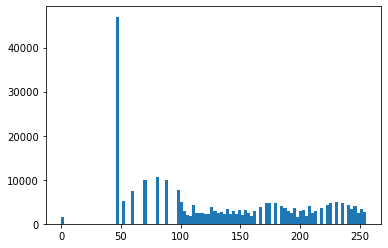

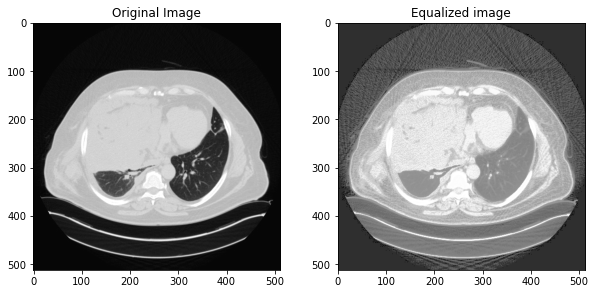

In [20]:
#Global Histogram equalization
img_hist_equalized = cv2.equalizeHist(img_base)
plt.hist(img_hist_equalized.flat, bins=100, range = (0,255))

fig = plt.figure(figsize=(10,10))

axis1 = fig.add_subplot(2,2,1)
axis1.imshow(img_base, cmap='gray')
axis1.title.set_text('Original Image')

axis2 = fig.add_subplot(2,2,2)
plt.imshow(img_hist_equalized,cmap = "gray")
axis2.title.set_text('Equalized image')

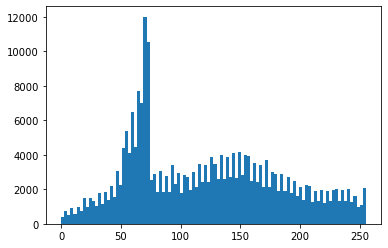

In [21]:
#Performing Contrast Limited Adaptive Histogram Equalization
#Creating an instance of CLAHE (Contrast Limited Adaptive Histogram Equalization)
#2 Parameters - clipLimit - Threshold for contrast limiting - default is 40
# tileGridSize - Size of grid for histogram equalization - default is 8x8
clahe_1 = cv2.createCLAHE()
img_contrast_hist_eq_1 = clahe_1.apply(img_base)
plt.hist(img_contrast_hist_eq_1.flat,bins=100, range = (0,255))
plt.show()

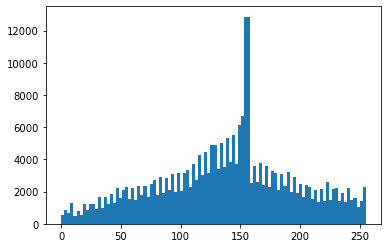

In [22]:
clahe_2 = cv2.createCLAHE(clipLimit = 140)
img_contrast_hist_eq_2 = clahe_2.apply(img_base)
plt.hist(img_contrast_hist_eq_2.flat,bins=100, range = (0,255))
plt.show()

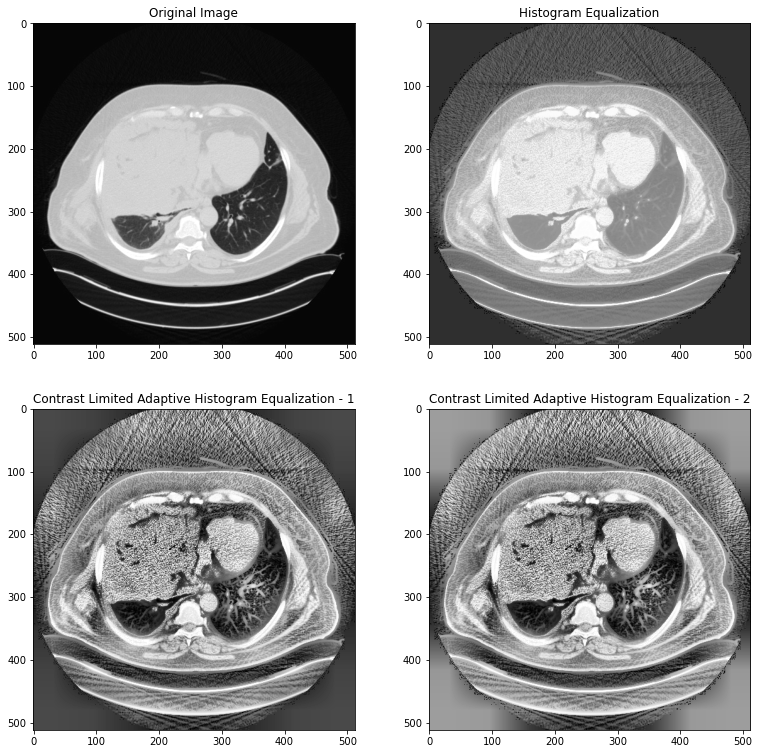

In [23]:
fig = plt.figure(figsize=(13,13))

#(2,2,1) -> x, y and which position
axis1 = fig.add_subplot(2,2,1)
axis1.imshow(img_base, cmap='gray')
axis1.title.set_text('Original Image')

axis2 = fig.add_subplot(2,2,2)
axis2.imshow(img_hist_equalized, cmap='gray')
axis2.title.set_text('Histogram Equalization')

axis3 = fig.add_subplot(2,2,3)
axis3.imshow(img_contrast_hist_eq_1, cmap='gray')
axis3.title.set_text('Contrast Limited Adaptive Histogram Equalization - 1')

axis4 = fig.add_subplot(2,2,4)
axis4.imshow(img_contrast_hist_eq_2, cmap='gray')
axis4.title.set_text('Contrast Limited Adaptive Histogram Equalization - 2')